# Step I:  EDA

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [159]:
# Set up the chosen style format
plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14
sns.set_context('notebook')


In [160]:
data = pd.read_csv('TheRealDonald.csv')
data.set_index('time');

,text,retweets,favorite,is_retweet,id
time,,,,,
2014-12-31 21:07:30,"""@BrettNeveraski: I see you @realDonaldTrump h...",53,166,False,550397860240707584
2014-12-31 21:15:21,To EVERYONE including all haters and losers HA...,1271,1209,False,550399835682390016
2014-12-31 23:56:23,"""@cpetelis: @realDonaldTrump If you run for Pr...",6,18,False,550440363090280448
2014-12-31 23:57:02,"""@djspookyshadow: Feeling a deep gratitude for...",9,31,False,550440523094577152
2014-12-31 23:57:25,"""@joelmch2os: @realDonaldTrump announce your p...",8,26,False,550440620792492032
...,...,...,...,...,...
2020-03-30 16:56:34,RT @DeptofDefense: LIVE: #USNSComfort arrives ...,9754,0,True,1244669862514917381
2020-03-30 17:05:33,https://t.co/nzWJ8ViwbZ,39114,173520,False,1244672122414338048
2020-03-30 17:11:59,On #NationalDoctorsDay we recognize the remark...,19753,82569,False,1244673740866191362


In [161]:
data.shape

(28506, 6)

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28506 entries, 0 to 28505
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        28506 non-null  object
 1   text        28506 non-null  object
 2   retweets    28506 non-null  int64 
 3   favorite    28506 non-null  int64 
 4   is_retweet  28506 non-null  bool  
 5   id          28506 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 1.1+ MB


In [163]:
data.describe()

,retweets,favorite,id
count,28506.000000,28506.000000,2.850600e+04
mean,11652.232688,38319.143689,9.179333e+17
std,12752.395254,52143.521487,2.399388e+17
min,0.000000,0.000000,5.503979e+17
25%,1518.250000,36.000000,6.740693e+17
50%,9107.000000,9352.500000,9.409173e+17
75%,17761.000000,70292.000000,1.161268e+18
max,369530.000000,879647.000000,1.244729e+18


In [164]:
# changing time from object to datetime 
data['time'] = pd.to_datetime(data.time)
data.dtypes

time          datetime64[ns]
text                  object
retweets               int64
favorite               int64
is_retweet              bool
id                     int64
dtype: object

In [165]:
print(data.time.min())
print(data.time.max())

2014-12-31 21:07:30
2020-03-30 20:50:35


In [166]:
# Extract just the date information from the timestamp
data['just_date'] = [x.date() for x in data['time']]
# Extract the year which ranges from 2014 to 2020 in this dataset
data['year'] = pd.DatetimeIndex(data['time']).year
# Extract the month of the year (1-12)
data['month'] = pd.DatetimeIndex(data['time']).month
# Extract the day of the month (1-31)
#data['day'] = pd.DatetimeIndex(data['time']).day
data[['year','month','day']] = \
pd.DataFrame([(x.year, x.month, x.day) for x in data['time']])
# The day of the week with Monday=0, Tuesday=1, Wednesday=2, Thursday=3,
# Friday=4, Saturday=5, Sunday=6
data['day_of_week'] = data['time'].dt.dayofweek
# Weekday or weekend boolean:
# 1 if weekday (Mon-Fri in U.S), 0 if weekend (Sat-Sun in U.S)
data['weekday'] = np.where(data['day_of_week'] >= 5, 0, 1)
# Extract just the time information from the timestamp
data['just_time'] = [x.time() for x in data['time']]
# Break the time down into hour, minute, second
data['hour'] = pd.DataFrame([(x.hour) for x in data['time']])

data['hour']=pd.to_numeric(data.hour)

In [167]:
data.head();

,time,text,retweets,favorite,is_retweet,id,just_date,year,month,day,day_of_week,weekday,just_time,hour
0,2014-12-31 21:07:30,"""@BrettNeveraski: I see you @realDonaldTrump h...",53,166,False,550397860240707584,2014-12-31,2014,12,31,2,1,21:07:30,21
1,2014-12-31 21:15:21,To EVERYONE including all haters and losers HA...,1271,1209,False,550399835682390016,2014-12-31,2014,12,31,2,1,21:15:21,21
2,2014-12-31 23:56:23,"""@cpetelis: @realDonaldTrump If you run for Pr...",6,18,False,550440363090280448,2014-12-31,2014,12,31,2,1,23:56:23,23
3,2014-12-31 23:57:02,"""@djspookyshadow: Feeling a deep gratitude for...",9,31,False,550440523094577152,2014-12-31,2014,12,31,2,1,23:57:02,23
4,2014-12-31 23:57:25,"""@joelmch2os: @realDonaldTrump announce your p...",8,26,False,550440620792492032,2014-12-31,2014,12,31,2,1,23:57:25,23


In [168]:
data.drop(data[data['year'] == 2014].index, inplace = True)

In [169]:
data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28498 entries, 8 to 28505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         28498 non-null  datetime64[ns]
 1   text         28498 non-null  object        
 2   retweets     28498 non-null  int64         
 3   favorite     28498 non-null  int64         
 4   is_retweet   28498 non-null  bool          
 5   id           28498 non-null  int64         
 6   just_date    28498 non-null  object        
 7   year         28498 non-null  int64         
 8   month        28498 non-null  int64         
 9   day          28498 non-null  int64         
 10  day_of_week  28498 non-null  int64         
 11  weekday      28498 non-null  int64         
 12  just_time    28498 non-null  object        
 13  hour         28498 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(9), object(3)
memory usage: 3.1+ MB


In [170]:
# extract part of day

def f(x):
    if (x >= 0 ) and ( x < 6):
        return 'Late_Night'
    elif (x >= 6) and (x < 12 ):
        return 'Morning'
    elif (x >= 12) and (x < 18):
        return'Noon'
    elif (x >= 18) and (x <= 22) :
        return 'Evening'
    else:
        return 'Late_Night'


data['Part_of_Day'] = data['hour'].apply(f)



In [171]:
data.head();

,time,text,retweets,favorite,is_retweet,id,just_date,year,month,day,day_of_week,weekday,just_time,hour,Part_of_Day
8,2015-01-01 00:00:26,"""@JaayZen: @realDonaldTrump Thanks Donald. Now...",12,33,False,550441381253382144,2015-01-01,2015,1,1,3,1,00:00:26,0,Late_Night
9,2015-01-01 00:02:37,"""@teamconquerca: First time in the""Trump Inter...",9,28,False,550441927964106753,2015-01-01,2015,1,1,3,1,00:02:37,0,Late_Night
10,2015-01-01 00:06:40,"""@AngelaTN777: @gochico @realDonaldTrump: He S...",15,36,False,550442948375347200,2015-01-01,2015,1,1,3,1,00:06:40,0,Late_Night
11,2015-01-01 00:09:01,"""@JaayZen: @grandmiapens He has all the ingred...",11,18,False,550443540111962113,2015-01-01,2015,1,1,3,1,00:09:01,0,Late_Night
12,2015-01-01 00:09:47,"""@MarcAardvark: @realDonaldTrump @ronmeier123 ...",7,17,False,550443735054839808,2015-01-01,2015,1,1,3,1,00:09:47,0,Late_Night


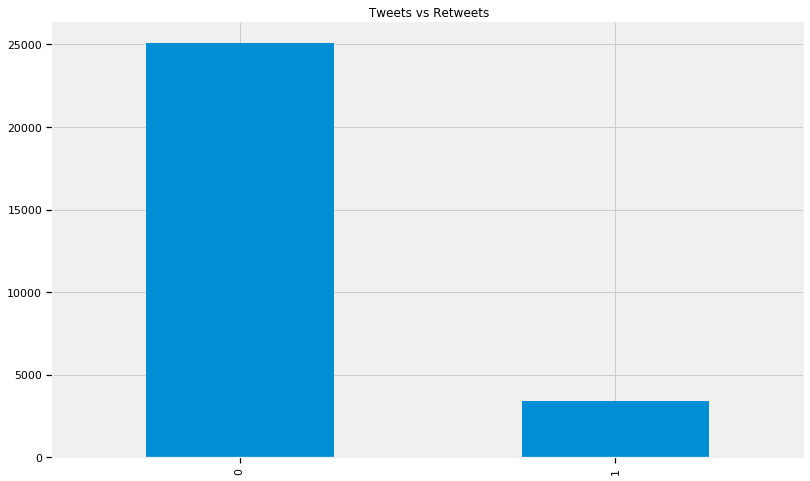

In [172]:

retweets = data.groupby(by ='is_retweet').count()[['text']].reset_index()
retweets.plot(kind='bar', title=" Tweets vs Retweets",legend=False);
plt.savefig("Tweets vs Retweets.png")

In [173]:
data= pd.concat([data,pd.get_dummies(data.Part_of_Day)],axis=1)
#data = data.drop(['Part_of_Day'], axis=1)

In [174]:
data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28498 entries, 8 to 28505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         28498 non-null  datetime64[ns]
 1   text         28498 non-null  object        
 2   retweets     28498 non-null  int64         
 3   favorite     28498 non-null  int64         
 4   is_retweet   28498 non-null  bool          
 5   id           28498 non-null  int64         
 6   just_date    28498 non-null  object        
 7   year         28498 non-null  int64         
 8   month        28498 non-null  int64         
 9   day          28498 non-null  int64         
 10  day_of_week  28498 non-null  int64         
 11  weekday      28498 non-null  int64         
 12  just_time    28498 non-null  object        
 13  hour         28498 non-null  int64         
 14  Part_of_Day  28498 non-null  object        
 15  Evening      28498 non-null  uint8         
 16  Late

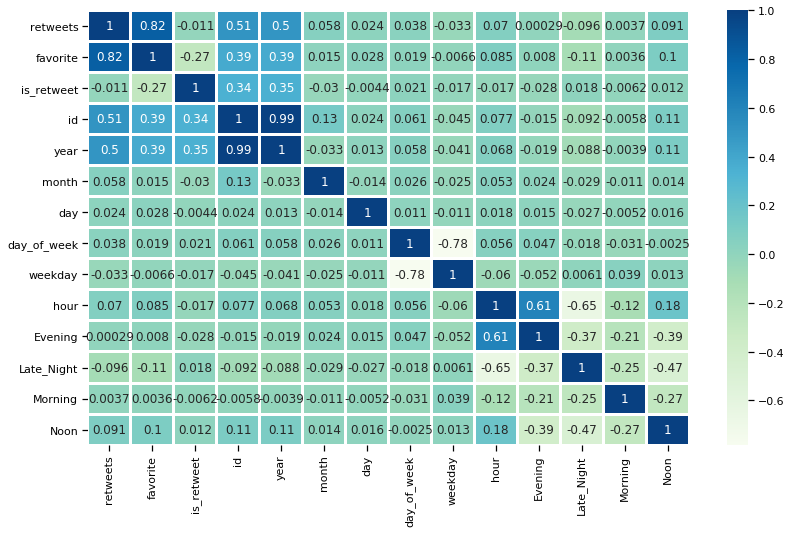

In [175]:
sns.heatmap(data.corr(),cmap="GnBu", annot=True,linewidth=2);

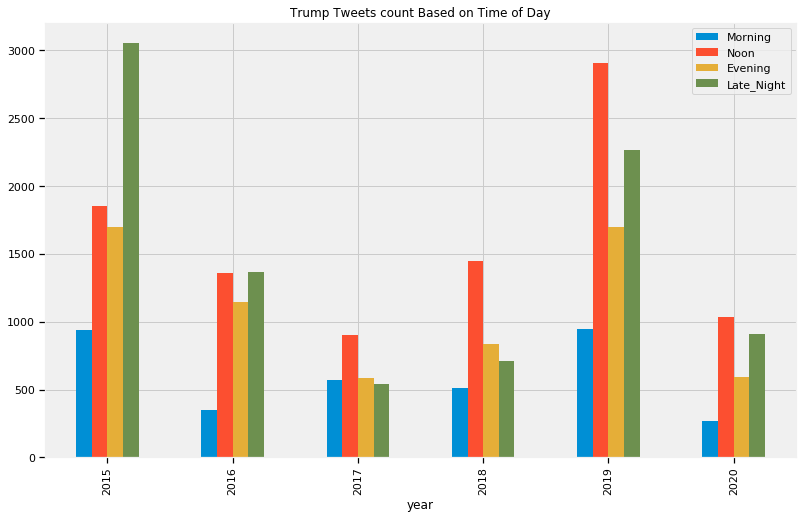

In [176]:
g = data.groupby(by= 'year').sum()[["Morning","Noon", "Evening","Late_Night"]]
g.plot(kind="bar",title= "Trump Tweets count Based on Time of Day");
plt.savefig('Trump Tweets count Based on Time of Day.png')

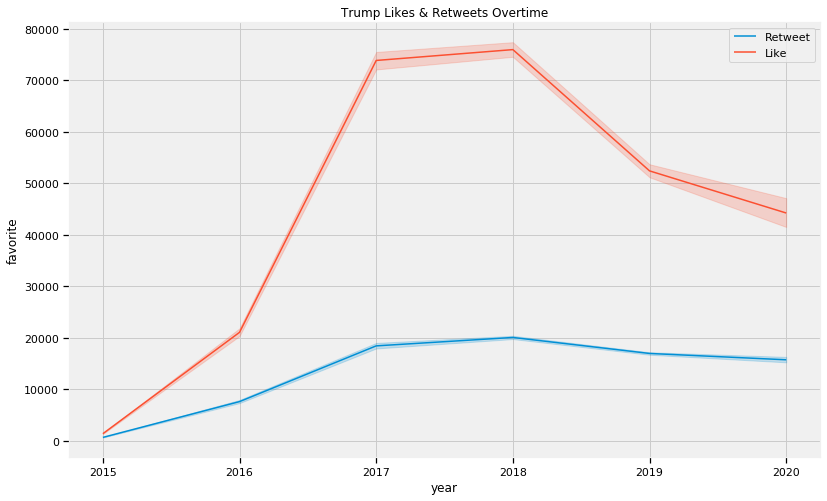

In [177]:
fig, ax = plt.subplots()
sns.lineplot(x=data.year, y=data.retweets, label='Retweet');
sns.lineplot(x=data.year, y=data.favorite, label='Like',).set_title("Trump Likes & Retweets Overtime");
ax.legend()
plt.savefig('Trump Likes & Retweets Overtime.png')

In [178]:
# retweet = pd.concat([data.is_retweet.value_counts(),
#                      data.is_retweet.value_counts(normalize=True).mul(100)], axis=1)
# retweet.columns = ['count', 'percentage']
# retweet

In [179]:
# Word Cloud

# from wordcloud import WordCloud, STOPWORDS


# text = clean_tweets
# wordcloud = WordCloud(
#     width = 3000,
#     height = 2000,
#     background_color = 'white').generate(str(text))
# fig = plt.figure(
#     figsize = (20, 15),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()
# #wordcloud.to_file('Donald Trump Tweets.png')

In [181]:
data = data.drop(['day_of_week','just_date','just_time','day','month','Morning', 'Noon',"Evening", 'Late_Night'], axis=1)


# Step II: NLP

In this step, I will apply varius natural language methods on the text column in order to extract text features and be able to use the results in the later stages. Below, I applied Tokenization, stemming, and  Lemmatization. After that I used  TFIDF - term frequency–inverse document frequency, which is a numerical statistic that is intended to reflect how important a word is to a document in a collection. I choose this instead of basic count vectorised because it is often used as a weighting factor in searches of information retrieval.

In [182]:
import nltk 
import string
import re

In [183]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

data['text_punct'] = data['text'].apply(lambda x: remove_punct(x))
#data.head(10)

In [184]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

data['text_tokenized'] = data['text_punct'].apply(lambda x: tokenization(x.lower()))
#data.head(10)

In [185]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
data['text_nonstop'] = data['text_tokenized'].apply(lambda x: remove_stopwords(x))
#data.head(10)

In [186]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

data['text_stemmed'] = data['text_nonstop'].apply(lambda x: stemming(x))
#data.head()

In [187]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data['text_lemmatized'] = data['text_nonstop'].apply(lambda x: lemmatizer(x))
#data.head()

In [188]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=clean_text, max_features=2000) 
tvec = tfidf.fit_transform(data['text'])
print('{} Number of tweets has {} words'.format(tvec.shape[0], tvec.shape[1]))


28498 Number of tweets has 2000 words


In [190]:
#print(tfidf.get_feature_names())

In [191]:
#print(tfidf.vocabulary_)

In [192]:
tfidf_df = pd.DataFrame(tvec.toarray(), columns=tfidf.get_feature_names())
tfidf_df.shape;
#tfidf_df.head();

,,abc,abe,abeshinzo,abl,absolut,abus,accept,access,accomplish,...,yet,york,young,your,youv,yr,zelenski,zero,zone,क
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.314395,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step III: Clustring

After finishing our text data cleaning, it is time to apply clustering in order to segregate the tweets into different classes based on the tweet content. For that, I have applied KMeans algorithm on the tfidf_df dataframe which contains the list of all features obtained from the text. One point to mension, The NLP analysis resulted in about 31000 features which is almost immpossible to run a clustering model depending on my laptop alone. After multiple attempts. I have decided to set my vectorizer maximum feature to 2000. 

In [193]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# compare a broad range of ks to start
ks = range(1,15)

# create an empty list to track inertias
inertias = []

# fit the models, save the evaluation metrics from each run
for k in ks: 
    model = KMeans(n_clusters=k,n_jobs=-1, random_state=144)
    model.fit(tfidf_df)
    labels = model.labels_
    inertias.append(model.inertia_)



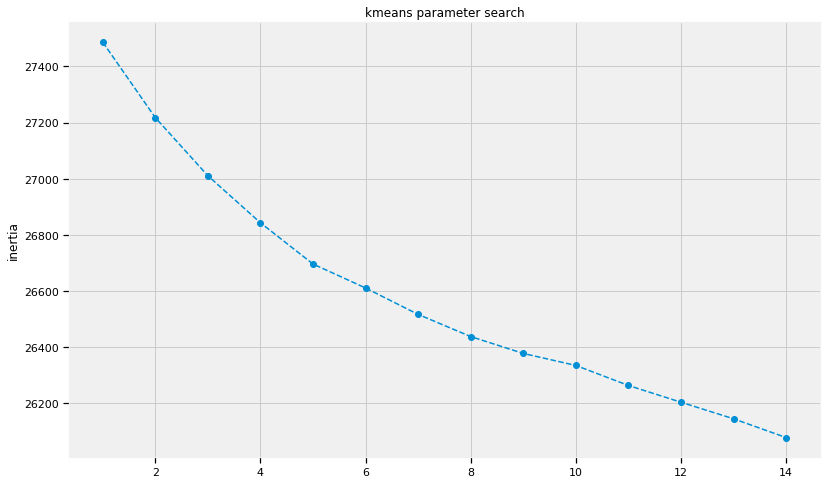

In [212]:
# plt.subplot(211)
plt.plot(ks, inertias, 'o--')
plt.ylabel('inertia')
plt.title('kmeans parameter search')
plt.savefig("kmeans parameter search ")

In [195]:
#For now, let’s go with our best k value of choice

best_k = 7

km_model = KMeans(n_clusters=best_k, n_jobs=-1, random_state=144)
km_model.fit(tfidf_df)
labels = km_model.labels_

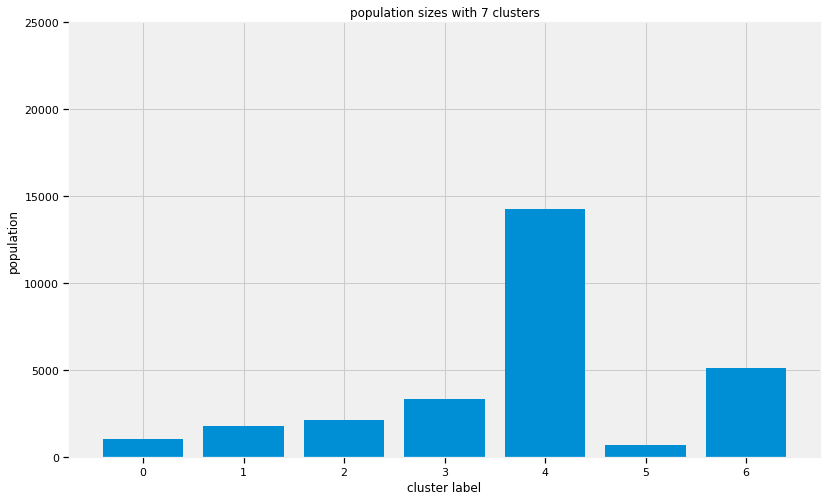

In [213]:
plt.bar(range(len(set(km_model.labels_))), np.bincount(km_model.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(best_k));
plt.savefig("Population Sizes with 7 clusters")

plt.ylim(0,25000);

In [214]:
data['clusters'] = labels


In [215]:
data.head();

In [218]:
data = data.drop(['text_punct','text_tokenized','text_nonstop','text_stemmed','text_lemmatized'], axis=1)

In [217]:
data.head();

In [201]:
import re
def  clean_text(data, text_field):
    data[text_field] = data[text_field].str.lower()
    data[text_field] = data[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return data

In [202]:
clean_text(data, "text");

In [203]:

pd.options.display.max_colwidth = 150
#print(data[data.clusters == 4]['text'].sample(15))
data.head();

In [260]:
data.clusters.value_counts()

labels = pd.concat([data.clusters.value_counts(),
                     data.clusters.value_counts(normalize=True).mul(100)], axis=1)
labels.columns =['count', 'percentage']

print(labels)

   count  percentage
4  14266   50.059653
6   5121   17.969682
3   3378   11.853463
2   2151    7.547898
1   1773    6.221489
0   1076    3.775704
5    733    2.572110


0 = praising others
1 = personal attacks
2 =  party nominations 
3=  media
4 = politics & policies
5 = praising himself 
6= others

# Classification 


After defining our seven tweet categories, it is time to try to predict the tweet class. I used a basic logistic regression model to try to predict the tweet topic.

In [205]:
#sns.heatmap(data.corr(),cmap="GnBu", annot=True,linewidth=2);

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [207]:
X = data['text']
y = data['clusters']

X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=35)

tfidf = TfidfVectorizer(stop_words="english")

X_train_counts= tfidf.fit_transform(X_train)
X_test_counts = tfidf.transform(X_test)

In [208]:
#X_train_counts.todense()

In [209]:
# X_test_counts.todense()

In [210]:
# cvec.get_feature_names()

In [211]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_counts, y_train)
print(log_reg.n_iter_)
print('model accuracy is: ',log_reg.score(X_test_counts, y_test))

[176]
model accuracy is:  0.7726315789473684


# Conclusion 

Overall in this project:
The overall purpose of this projec was to analyze President Donald Trump Tweets  and try to predict what topics he feels like tweeting about:

- Obtained tweets archive from http://www.trumptwitterarchive.com/ and saved in CSV format.

- ***Exploratory Data Analysis:***
    make sure datatypes are correct and remove unnecessary columns.
    visualize relationship between variables
    
- ***Natural Language Processing:***
    extract text features in order to analyze the data
    
- ***Clustering:***
    After finalizing the text analysis, I was able to apply clustering algorithm in order to identify each tweet class. Next, performed  manual cluster exploration in order to identify each cluster topic.
    
- ***Classification:***
    After having the topic classifcation ready, it was time to try to predict the tweet topic using Logistic regression classifier. The classifier was able to predict 77% of the tweets topics which I find satesfying based on the complexity level of the model 
    
Moving forward there are a few approached I feel would be very helpful to increase the model prediction accuracy:

- Work with other NLP libraries that might be able to analyze text.In our case, some of trump tweets were by other languages and so having the right tool to analyze the text is important. 
- Deep learning methodology such as nueral netweor in order to analyze text data more efficiently. Traditional NLP often uses one-hot encoding to represent the word in a fixed vocabulary and uses a BoW to represent documents. while deep learning algorithms attempt to learn multiple levels of representation of increasing complexity/abstraction.
- As mentioned earlier, the total features extracted from the text were about 31000. Therefore, applying the code on a cloud service such as AWS and Kaggle TPU might be helpful since they have a very high processing capability.
_ There is also the option of trying different models since both KMeans and Logistic Regression are not the most optimum choice with regards to dealing with text data. However,I believe crucial part of this project and others that deal with text is the ability to extract the right features which relates more to the  quality of the features applied in any model. 
